Оптимальные значения параметров через МНК: [1.0078373  6.33327404]
Оптимальные значения параметров через стохастический градиентный спуск: [1.20664827 0.07107177]


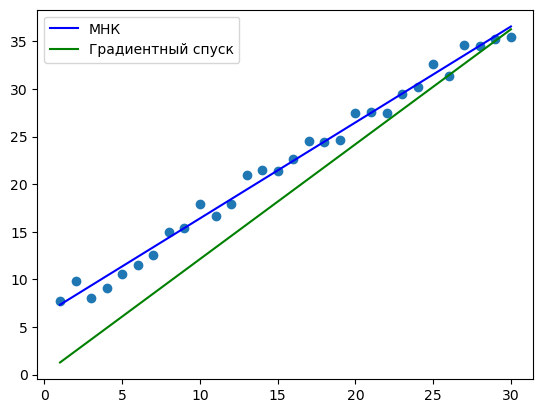

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация данных
data = np.array([[i, np.random.rand() * 3 + i + 5] for i in range(1, 31)])
Y = data[:, 1]
X = np.column_stack((data[:, 0], np.ones(len(data))))

# Функция для вычисления значения функции потерь
def f(a, b):
    return np.sum((Y - np.dot(X, [a, b]))**2)

# Метод наименьших квадратов для поиска оптимальных значений параметров
optimal_params = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

# Функция для вычисления градиента
def df(a, b):
    point = np.random.randint(0, len(data))
    gradient_a = -2 * X[point, 0] * (Y[point] - np.dot(X[point], [a, b]))
    gradient_b = -2 * (Y[point] - np.dot(X[point], [a, b]))
    return np.array([gradient_a, gradient_b])

# Инициализация параметров и гиперпараметров
w0 = np.array([0, 0])
learning_rate = 0.00001
tolerance = 0.0001
convergence = False
iterations = 0
res = [w0]

# Стохастический градиентный спуск
while not convergence:
    gradient = df(*w0)
    w1 = w0 - learning_rate * gradient
    res.append(w1)
    if np.linalg.norm(w1 - w0) < tolerance:
        convergence = True
    w0 = w1
    iterations += 1

# Вывод результатов и визуализация
print("Оптимальные значения параметров через МНК:", optimal_params)
print("Оптимальные значения параметров через стохастический градиентный спуск:", w0)

plt.scatter(data[:, 0], data[:, 1])
plt.plot(data[:, 0], optimal_params[1] + optimal_params[0] * data[:, 0], color='blue', label='МНК')
plt.plot(data[:, 0], w0[1] + w0[0] * data[:, 0], color='green', label='Градиентный спуск')
plt.legend()
plt.show()
